<a href="https://colab.research.google.com/github/ajrianop/ML/blob/main/Clase29ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Regresión logistica**

In [1]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


La idea es clasificar si dado un usuario que visita un sitio web usa alguno de los siguientes sistemas operativos, enumerados:
 0. Windows 
 1. Macintosh
 2. Linux

In [2]:
import pandas as pd
import numpy as np
from sklearn import linear_model, model_selection
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, r2_score
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

In [3]:
df = pd.read_csv(r'/content/gdrive/MyDrive/PythonBX/Módulo 3/DATASET/clase29/usuarios_win_mac_lin.csv')
df.head()

,duracion,paginas,acciones,valor,clase
0,7.0,2,4,8,2
1,21.0,2,6,6,2
2,57.0,2,4,4,2
3,101.0,3,6,12,2
4,109.0,2,6,12,2


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170 entries, 0 to 169
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   duracion  170 non-null    float64
 1   paginas   170 non-null    int64  
 2   acciones  170 non-null    int64  
 3   valor     170 non-null    int64  
 4   clase     170 non-null    int64  
dtypes: float64(1), int64(4)
memory usage: 6.8 KB


In [5]:
df.describe()

,duracion,paginas,acciones,valor,clase
count,170.000000,170.000000,170.000000,170.000000,170.000000
mean,111.075729,2.041176,8.723529,32.676471,0.752941
std,202.453200,1.500911,9.136054,44.751993,0.841327
min,1.000000,1.000000,1.000000,1.000000,0.000000
25%,11.000000,1.000000,3.000000,8.000000,0.000000
50%,13.000000,2.000000,6.000000,20.000000,0.000000
75%,108.000000,2.000000,10.000000,36.000000,2.000000
max,898.000000,9.000000,63.000000,378.000000,2.000000


Contamos la cantidad de elementos que hay de cada clase. Notemos que la función cuenta por cada columna. 

In [6]:
print(df.groupby('clase').count())

       duracion  paginas  acciones  valor
clase                                    
0            86       86        86     86
1            40       40        40     40
2            44       44        44     44


In [7]:
'''
Cuenta la cantidad de elementos que tenemos por la variable clase (es la clasificación del sistema operativo
'''
print(df.groupby('clase').size())

clase
0    86
1    40
2    44
dtype: int64


Esto indica que tendremos:

  0. 86 veces utilizado Windows 
  1. 40 veces utilizado Macintosh
  2. 44 veces utilizado Linux

<function matplotlib.pyplot.show(close=None, block=None)>

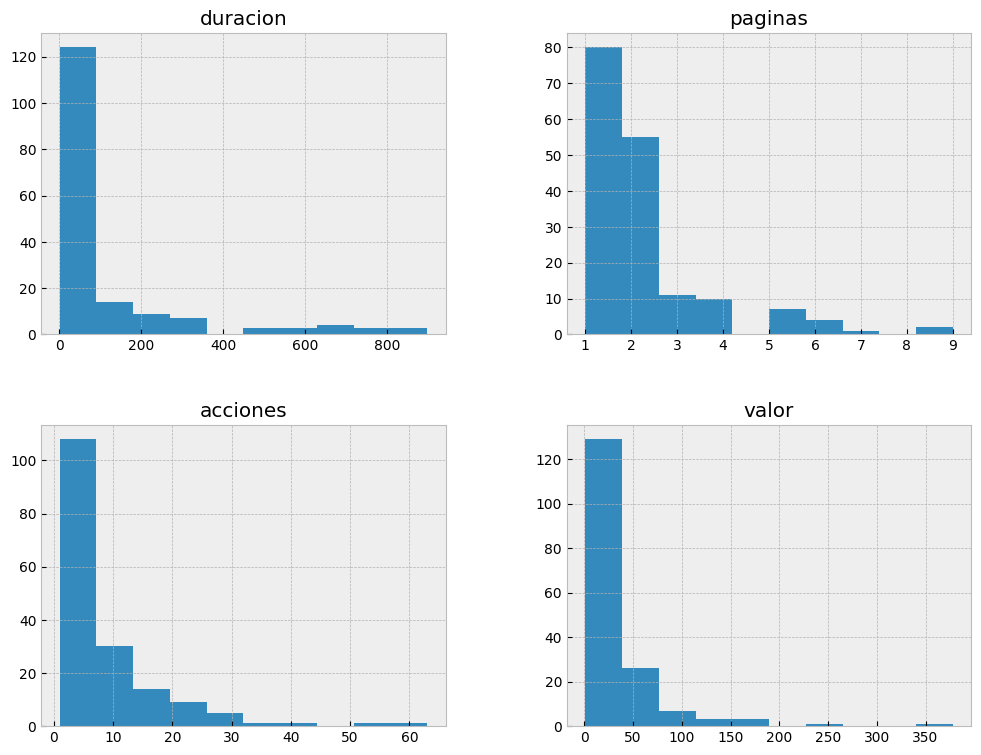

In [21]:
plt.rcParams['figure.figsize'] = (12,9)
plt.style.use('bmh')
'''
Visualizamos los datos para comprender la información. De tal modo creamos una
tabla de frecuencias para observar como se distribuye la información a lo largo
de cada cambio de variable.

Se extrae la variable objetivo del gráfico
'''
df.drop(['clase'], axis = 1).hist()
plt.show

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


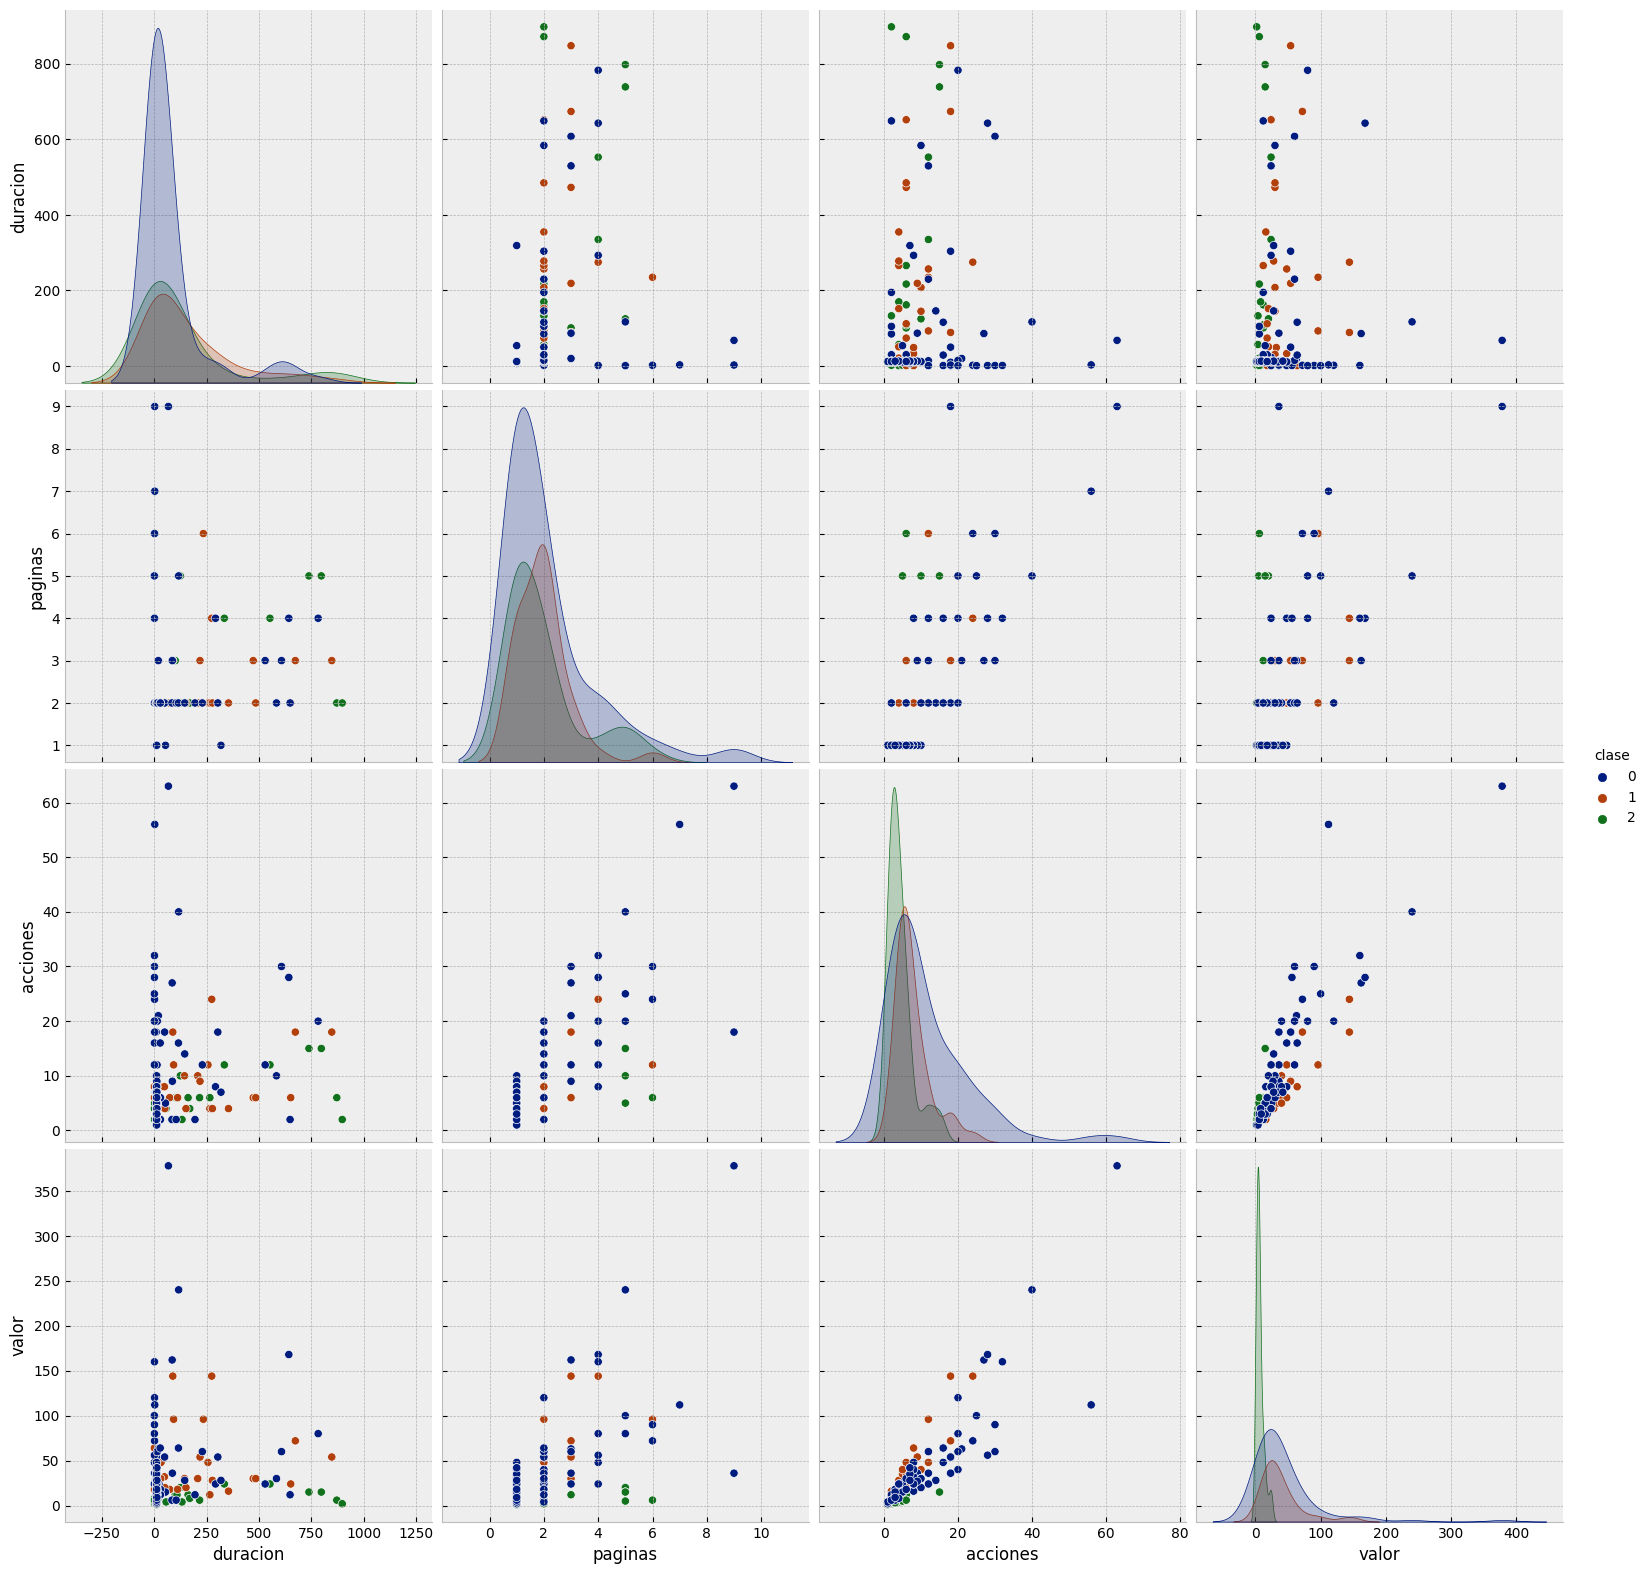

In [9]:
sb.pairplot(df.dropna(), hue ='clase', size = 4, vars = ['duracion', 'paginas', 'acciones', 'valor'], palette= 'dark')

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


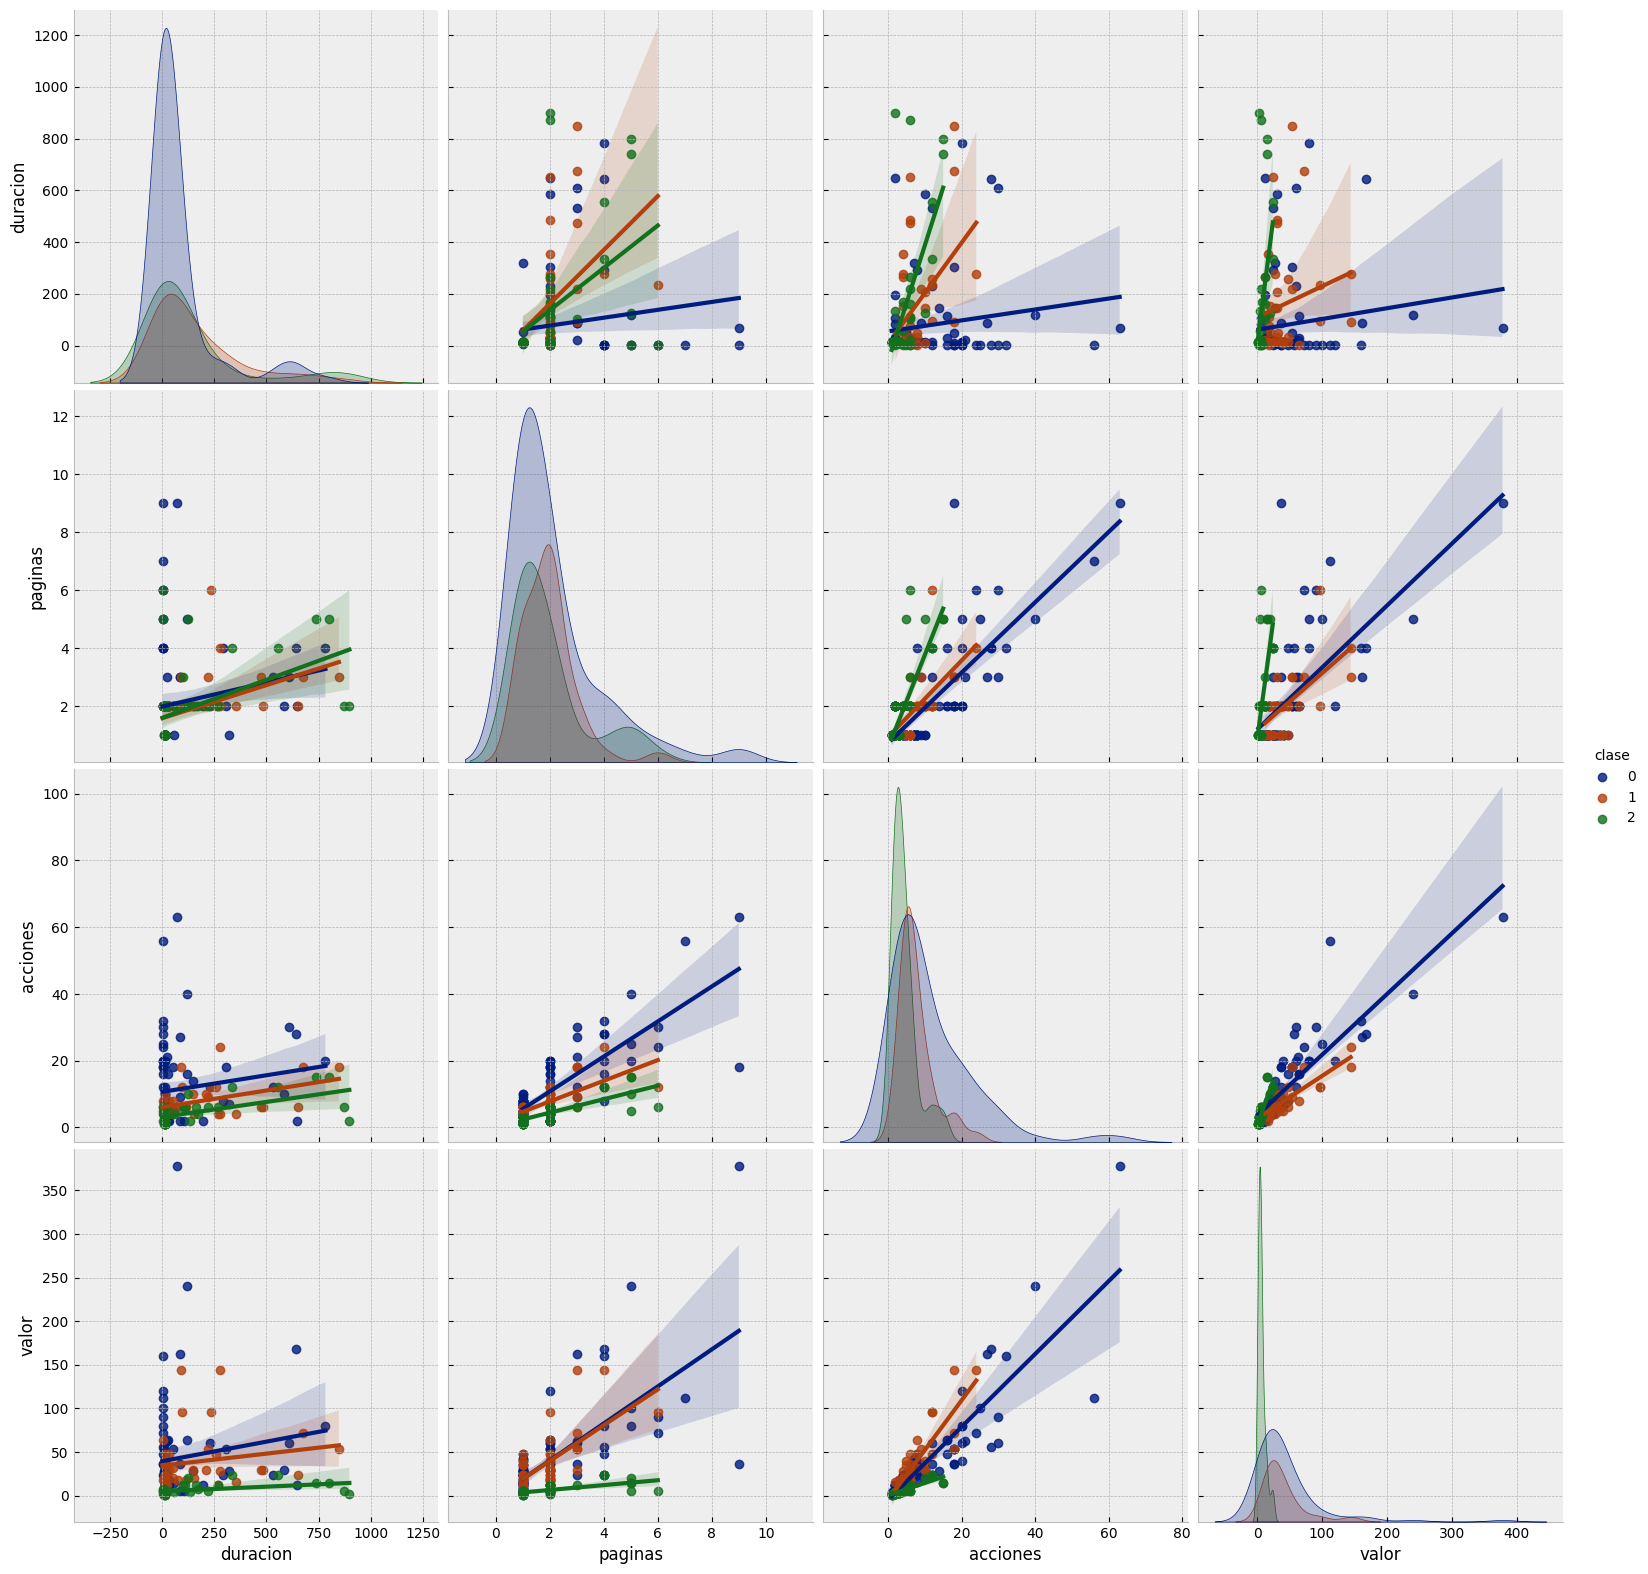

In [10]:
sb.pairplot(df.dropna(), hue ='clase', size = 4, vars = ['duracion', 'paginas', 'acciones', 'valor'], palette= 'dark', kind = 'reg')

In [11]:
correlation_matrix = df.corr()
correlation_matrix

,duracion,paginas,acciones,valor,clase
duracion,1.000000,0.277550,0.163028,0.090869,0.128706
paginas,0.277550,1.000000,0.724061,0.583910,-0.052813
acciones,0.163028,0.724061,1.000000,0.862961,-0.329954
valor,0.090869,0.583910,0.862961,1.000000,-0.322737
clase,0.128706,-0.052813,-0.329954,-0.322737,1.000000


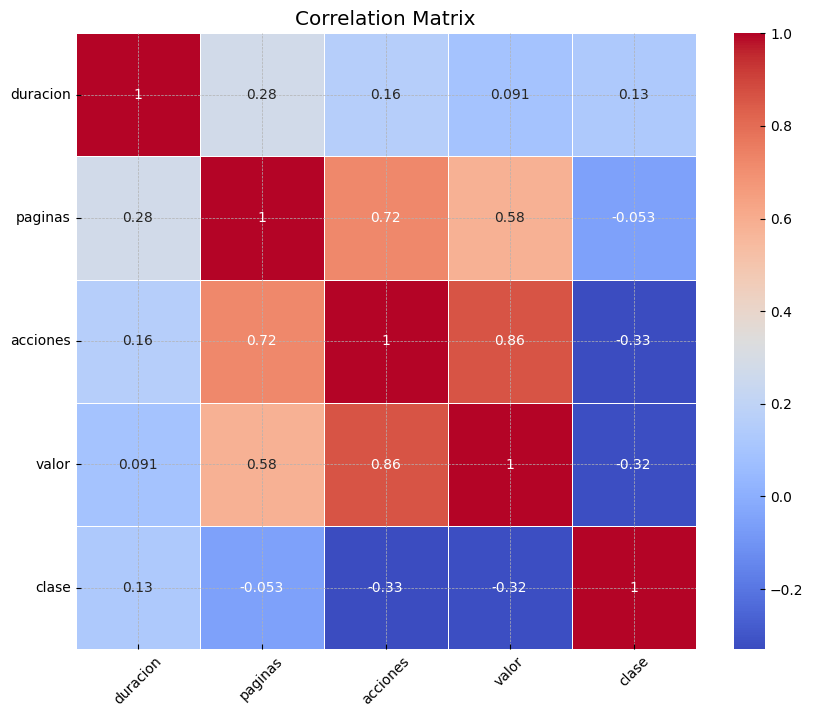

In [12]:
# Create a heatmap using seaborn
plt.figure(figsize=(10, 8))
sb.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')

# Rotate the tick labels for better readability
plt.xticks(rotation=45)
plt.yticks(rotation=0)

# Show the plot
plt.show()

La matriz de correlaciones, nos presenta si las variables siguen una tendencia similar a otras mediante una representación númerica. En este caso si el valor es muy próximo a:
1. 1 tenemos que las variables posiblemente guardan relación directa entres sí.
2. -1 tenemos que las variables guardan posiblemente relación inversa entre sí. (refiere a una tendencia negativa)
3. 0 las variables no tienen correlación. 
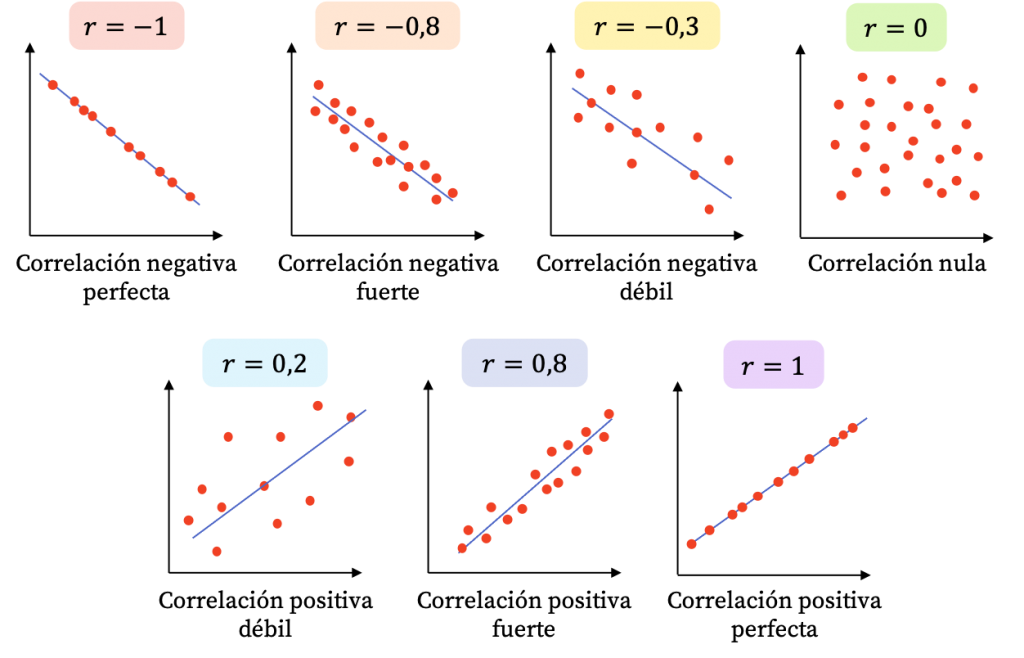


Durante el análisis de variables correlacionadas, nosotros queremos evitar a toda costa la multicorrelación, es decir entrenar un modelo con variables fuertemente relacionadas, esto ya que al tener tendencia similar, sobrecargarían la información de entrenamiento y a pesar de generar quiza mejores resultados nos llevaría a un sobre entrenamiento.

In [13]:
'''
Considerando las variables de entrenamiento, tenemos que extraer la información 
de las 
caracteristicas ---> X
objetivos ---> y
'''
X = np.array(df.drop(['clase'], axis =1))
y = np.array(df['clase'])
# Viendo que la cantidad de filas coinciden

print(f'longitud X = {X.shape[0]} \n longitud de y = {y.shape[0]}')
print(f'\nNúmero de variables para el entreanamiento {X.shape[1]}')

longitud X = 170 
 longitud de y = 170

Número de variables para el entreanamiento 4


In [22]:
model = linear_model.LogisticRegression()
model.fit(X,y)

# Mostramos 5 elementos de la predicción
y_pred = model.predict(X)

print(y_pred[0:10])

[2 2 2 2 2 2 2 2 2 2]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [15]:
model.score(X,y)

0.7823529411764706

In [16]:
r2 = 1- (((y-y_pred)** 2).sum() / ((y-y.mean())** 2).sum() )
r2

0.5151455546813533

In [17]:
r2_score(y, y_pred)

0.5151455546813533

Validación

In [18]:
validation_size = 0.20
seed = 7
X_train, X_validation, y_train, y_validation = model_selection.train_test_split( X , y , test_size =validation_size, random_state = seed)

In [19]:
name = 'Logistic Regresion'
kfold = model_selection.KFold(n_splits = 10, shuffle=True ,random_state = seed)
cv_results =  model_selection.cross_val_score(model, X_train, y_train , cv=kfold , scoring = 'accuracy')
msg = '%s: %f (%f)' % (name, cv_results.mean(), cv_results.std())
print(f'------\n\n{msg}\n\n--------')

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

------

Logistic Regresion: 0.712637 (0.146407)

--------


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [20]:
predictions = model.predict(X_validation)
print(accuracy_score(y_validation, predictions))
# Matriz de confusión para ver como se distribuyen los datos correctos e incorrectos
print(f'-------\nMatriz de confusión:\n {confusion_matrix(y_validation, predictions)}')
print(f'-------\n Reporte:\n {classification_report(y_validation, predictions)}')

0.8529411764705882
-------
Matriz de confusión:
 [[16  0  2]
 [ 3  3  0]
 [ 0  0 10]]
-------
 Reporte:
               precision    recall  f1-score   support

           0       0.84      0.89      0.86        18
           1       1.00      0.50      0.67         6
           2       0.83      1.00      0.91        10

    accuracy                           0.85        34
   macro avg       0.89      0.80      0.81        34
weighted avg       0.87      0.85      0.84        34

